# EDA

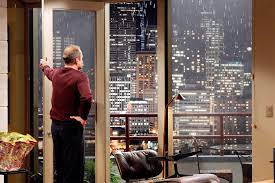

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

Step 1: Read in and explore the dataset

In [2]:
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [3]:
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.000         3      1.000         1180   
1  6414100192   12/9/2014 538000.000         3      2.250         2570   
2  5631500400   2/25/2015 180000.000         2      1.000          770   
3  2487200875   12/9/2014 604000.000         4      3.000         1960   
4  1954400510   2/18/2015 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650   1.000         NaN 0.000          3      7        1180   
1      7242   2.000       0.000 0.000          3      7        2170   
2     10000   1.000       0.000 0.000          3      6         770   
3      5000   1.000       0.000 0.000          5      7        1050   
4      8080   1.000       0.000 0.000          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0           0.0      1955         0.000    98178 47.511 -122.257   
1         400.0      1951      1991.000    98125 47.721 -122.319   
2           0.0      1933           NaN    98028 47.738 -122.233   
3         910.0      1965         0.000    98136 47.521 -122.393   
4           0.0      1987         0.000    98074 47.617 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [4]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21597.000   21597.000 21597.000  21597.000    21597.000   
mean  4580474287.771  540296.574     3.373      2.116     2080.322   
std   2876735715.748  367368.140     0.926      0.769      918.106   
min      1000102.000   78000.000     1.000      0.500      370.000   
25%   2123049175.000  322000.000     3.000      1.750     1430.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900490.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21597.000 21597.000   19221.000 21534.000  21597.000 21597.000   
mean    15099.409     1.494       0.008     0.234      3.410     7.658   
std     41412.637     0.540       0.087     0.766      0.651     1.173   
min       520.000     1.000       0.000     0.000      1.000     3.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10685.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count   21597.000 21597.000     17755.000 21597.000 21597.000 21597.000   
mean     1788.597  1971.000        83.637 98077.952    47.560  -122.214   
std       827.760    29.375       399.946    53.513     0.139     0.141   
min       370.000  1900.000         0.000 98001.000    47.156  -122.519   
25%      1190.000  1951.000         0.000 98033.000    47.471  -122.328   
50%      1560.000  1975.000         0.000 98065.000    47.572  -122.231   
75%      2210.000  1997.000         0.000 98118.000    47.678  -122.125   
max      9410.000  2015.000      2015.000 98199.000    47.778  -121.315   

       sqft_living15  sqft_lot15  
count      21597.000   21597.000  
mean        1986.620   12758.284  
std          685.230   27274.442  
min          399.000     651.000  
25%         1490.000    5100.000  
50%         1840.000    7620.000  
75%         2360.000   10083.000  
max         6210.000  871200.000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.shape

(21597, 21)

In [7]:
df.duplicated().value_counts()

False    21597
dtype: int64

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Step 2: Discover missing values and replace them with reasonable values

In [9]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
df.loc[df.sqft_basement == '?', 'sqft_basement'] = df.sqft_living - df.sqft_above

In [11]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['view'] = df['view'].fillna(0)

In [12]:
df.sort_values('long', inplace=True)
df.waterfront.fillna(method='ffill', inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
df['waterfront'] = df['waterfront'].astype(int)
df['view'] = df['view'].astype(int)
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['yr_renovated'] = df['yr_renovated'].astype(int)


In [14]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21597.000   21597.000 21597.000  21597.000    21597.000   
mean  4580474287.771  540296.574     3.373      1.751     2080.322   
std   2876735715.748  367368.140     0.926      0.734      918.106   
min      1000102.000   78000.000     1.000      0.000      370.000   
25%   2123049175.000  322000.000     3.000      1.000     1430.000   
50%   3904930410.000  450000.000     3.000      2.000     1910.000   
75%   7308900490.000  645000.000     4.000      2.000     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21597.000 21597.000   21597.000 21597.000  21597.000 21597.000   
mean    15099.409     1.446       0.008     0.233      3.410     7.658   
std     41412.637     0.552       0.087     0.765      0.651     1.173   
min       520.000     1.000       0.000     0.000      1.000     3.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.000       0.000     0.000      3.000     7.000   
75%     10685.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.000       1.000     4.000      5.000    13.000   

       sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
count   21597.000      21597.000 21597.000     21597.000 21597.000 21597.000   
mean     1788.597        291.725  1971.000        68.758 98077.952    47.560   
std       827.760        442.668    29.375       364.037    53.513     0.139   
min       370.000          0.000  1900.000         0.000 98001.000    47.156   
25%      1190.000          0.000  1951.000         0.000 98033.000    47.471   
50%      1560.000          0.000  1975.000         0.000 98065.000    47.572   
75%      2210.000        560.000  1997.000         0.000 98118.000    47.678   
max      9410.000       4820.000  2015.000      2015.000 98199.000    47.778   

           long  sqft_living15  sqft_lot15  
count 21597.000      21597.000   21597.000  
mean   -122.214       1986.620   12758.284  
std       0.141        685.230   27274.442  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.231       1840.000    7620.000  
75%    -122.125       2360.000   10083.000  
max    -121.315       6210.000  871200.000

Step 3: As the investor wants to buy houses in poor neighborhoods, we need to define a poor neighborhood

Definition of a poor neighborhood:
- houses are graded badly (zipcodes with most houses in lowest 20% of dataset)
- houses have a lower price (zipcodes with lowest 20% of dataset)
- houses are small (zipcodes lowest 20% of dataset)


In [16]:
badly_graded = df.groupby('zipcode').mean().sort_values('grade')
badly_graded = badly_graded[:int(round((badly_graded.grade.count())*0.2))]


In [17]:
low_price = df.groupby('zipcode').mean().sort_values('price')
low_price = low_price[:int(round((low_price.grade.count())*0.2))]

In [18]:
small = df.groupby('zipcode').mean().sort_values('sqft_living')
small = small[:int(round((small.grade.count())*0.2))]

In [19]:
df_common1 = small.reset_index().merge(low_price, how = 'inner' ,indicator=False).set_index('zipcode')
df_common2 = df_common1.reset_index().merge(badly_graded, how = 'inner' ,indicator=False).set_index('zipcode')
df_common2

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
zipcode                                                                         
98168   3204784607.100 240328.372     2.996      1.223     1468.625 11269.844   
98148   5579458803.544 284908.596     3.140      1.491     1610.526  8960.719   
98002   4850894131.724 234284.035     3.327      1.533     1627.744  7517.633   
98178   4291467000.687 310612.756     3.305      1.439     1729.351  8309.122   

         floors  waterfront  view  condition  grade  sqft_above  \
zipcode                                                           
98168     1.086       0.000 0.015      3.245  6.509    1234.089   
98148     1.193       0.000 0.000      3.070  6.947    1486.491   
98002     1.286       0.000 0.010      3.744  6.693    1522.538   
98178     1.134       0.038 0.534      3.321  6.817    1325.992   

         sqft_basement  yr_built  yr_renovated    lat     long  sqft_living15  \
zipcode                                                                         
98168          234.535  1952.721        44.331 47.490 -122.308       1471.680   
98148          124.035  1963.263        34.596 47.437 -122.329       1611.228   
98002          105.206  1967.774        49.925 47.309 -122.213       1479.030   
98178          403.359  1955.233        68.714 47.499 -122.247       1648.817   

         sqft_lot15  
zipcode              
98168      9744.022  
98148      8812.386  
98002      7585.482  
98178      8149.641

Step 4: Set up our hypotheses and test them.

Hypotheses
1. The smaller the houses around a house, the lower the house price.
2. If a house is located in an area with small houses, it's more likely to be graded badly.
3. If a house is in a poor neighborhood, it tends to be smaller and to have a smaller lot.
4. The longer ago a house has been renovated, the lower the price.
5. The newer a house, the bigger the house.
6. The closer a house is to the city center, the smaller it is.

In [20]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="price", hover_data=["grade", "condition"],
                        color_discrete_sequence=["fuchsia"], zoom=8, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(mapbox_bounds={"west": -10, "east": -50, "south": 20, "north": 90})
fig.show()

1. The smaller the houses around a house, the lower the house price.

In [21]:
r = np.corrcoef(df['price'], df['sqft_living15'])
r

array([[1.       , 0.5852412],
       [0.5852412, 1.       ]])

In [22]:
fig = px.scatter(df, x='sqft_living15', y='price')
fig.show()

2. If a house is located in an area with small houses, it's more likely to be graded badly.

In [23]:
grouped_df = df.groupby('zipcode').mean()

In [24]:
r = np.corrcoef(grouped_df['sqft_living15'], grouped_df['grade'])
r

array([[1.        , 0.91743516],
       [0.91743516, 1.        ]])

In [25]:
fig = px.scatter(grouped_df, x='sqft_living15', y='grade')
fig.show()

3. If a house is in a poor neighborhood, it tends to be smaller and to have a smaller lot.
Assumptions:
- poor neighborhood = zipcode with low house prices (98168, 98148, 98002, 98178)

In [26]:
mean_sqft_whole = df['sqft_living'].mean()
lot_whole = df['sqft_lot'].mean()

In [27]:
zipcodes=[98168, 98148, 98002, 98178]

In [28]:
df_poor = df.loc[df['zipcode'].isin (zipcodes)]
mean_sqft_poor = df_poor['sqft_living'].mean()
lot_poor = df_poor['sqft_lot'].mean()

In [29]:
data_poor = {'Mean_Sqft':[df['sqft_living'].mean(), df_poor['sqft_living'].mean()], 'Mean_Sqft_Lot':[df['sqft_lot'].mean(), df_poor['sqft_lot'].mean()
], 'Neighborhood': ['not_poor', 'poor']}
poor_plot = pd.DataFrame(data_poor)
poor_plot.head()

Mean_Sqft  Mean_Sqft_Lot Neighborhood
0   2080.322      15099.409     not_poor
1   1605.935       9168.168         poor

<AxesSubplot: xlabel='Neighborhood'>

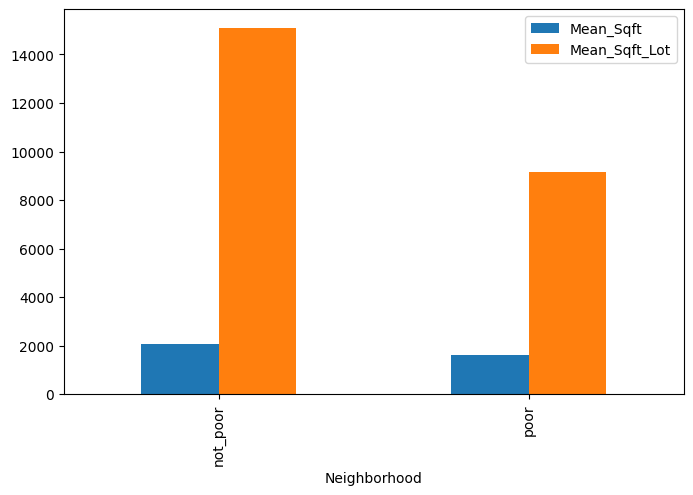

In [30]:
poor_plot.plot(x="Neighborhood", y=["Mean_Sqft", "Mean_Sqft_Lot"], kind="bar")

4. If a house has been renovated at least once, it tends to have a higher price.

In [31]:
df['renovated'] = np.where(df['yr_renovated']== 0, False, True)

In [32]:
renovated_houses = df[df['yr_renovated'] != 0]
renovated_houses.price.mean()

768901.8924731183

In [33]:
not_renovated_houses = df[df['yr_renovated'] == 0]
not_renovated_houses.price.mean()

532140.319858054

In [34]:
data_renovated = {'Mean_price':[renovated_houses.price.mean(), not_renovated_houses.price.mean()],
'Renovation': ['renovated', 'not_renovated']}
renovated_plot = pd.DataFrame(data_renovated)
renovated_plot.head()

Mean_price     Renovation
0  768901.892      renovated
1  532140.320  not_renovated

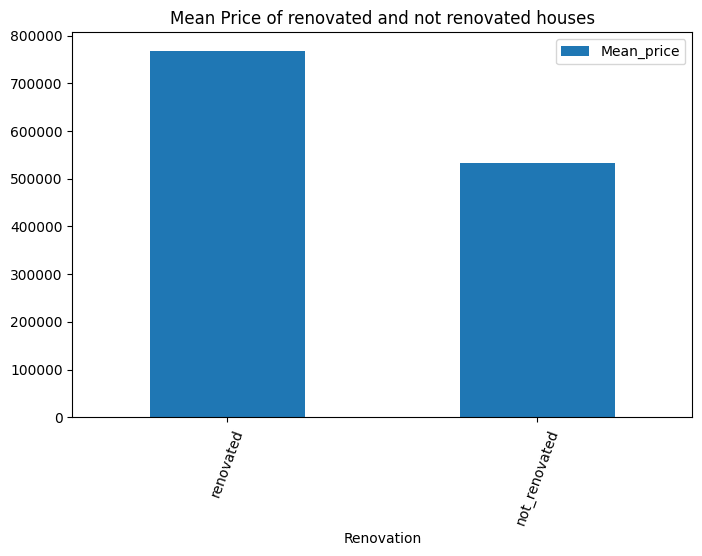

In [35]:
renovated_plot.plot.bar(x="Renovation", y="Mean_price", rot=70, title="Mean Price of renovated and not renovated houses");

plt.show(block=True);

In [36]:
r = np.corrcoef(df['yr_renovated'], df['price'])
r

array([[1.        , 0.11785523],
       [0.11785523, 1.        ]])

In [37]:
r = np.corrcoef(renovated_houses['yr_renovated'], renovated_houses['price'])
r

array([[1.        , 0.12549912],
       [0.12549912, 1.        ]])

In [38]:
fig = px.scatter(x=renovated_houses['yr_renovated'], y=renovated_houses['price'])
fig.show()

5. The newer a house, the bigger the house.

In [39]:
r = np.corrcoef(df['yr_built'], df['sqft_living'])
r

array([[1.        , 0.31815229],
       [0.31815229, 1.        ]])

In [40]:
fig = px.scatter(df, x="yr_built", y="sqft_living")
fig.show()

6. The closer a house is to the city center, the smaller it is.
Assumptions:
- The city center in Seattle is "Downtown Seattle" with the zip code "98121" (coordinates: long: 47.60501226795289, lat: -122.33444324132053)

In [41]:
import geopy.distance
def distancer(row):
    coords_1 = (row['lat'], row['long'])
    coords_2 = (47.60501226795289, -122.33444324132053)
    return geopy.distance.distance(coords_1, coords_2).km

df['distance_center'] = df.apply(distancer, axis=1)

In [42]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
13873  3522029124 2014-12-03 575000.000         3          2         2690   
9289   1422029138 2014-09-02 565000.000         3          2         2030   
2962   2322029048 2014-11-19 999000.000         3          2         2830   
1166   3523029041 2014-10-09 290000.000         2          0          440   
6096    222029026 2014-09-17 340000.000         2          0         1060   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
13873    435600       2           0     0          3      8        2690   
9289     217805       1           0     0          3      9        2030   
2962     505166       1           1     3          4      8        1830   
1166       8313       1           1     3          4      5         440   
6096      48292       1           1     2          5      6         560   

       sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
13873          0.000      1992             0    98070 47.348 -122.519   
9289           0.000      1999             0    98070 47.394 -122.515   
2962        1000.000      1962             0    98070 47.378 -122.514   
1166           0.000      1943             0    98070 47.434 -122.512   
6096         500.000      1947             0    98070 47.428 -122.511   

       sqft_living15  sqft_lot15  renovated  distance_center  
13873           1700      163350      False           31.811  
9289            1870      109468      False           27.100  
2962            2120       21988      False           28.618  
1166             880       26289      False           23.254  
6096             750       80201      False           23.706

In [43]:
r = np.corrcoef(df['distance_center'], df['sqft_living'])
r

array([[1.        , 0.07741065],
       [0.07741065, 1.        ]])

In [44]:
fig = px.scatter(df, x="distance_center", y="sqft_living")
fig.show()

Buy recommendation: Search for a house in a poor neighborhood which has a price/sqft clearly below the average. The first 5 houses could be interesting and should be looked at more precisely. A renovation could possibly help to increase the price and the quality of living.

In [45]:
df_poor['price_sqft'] = df_poor['price'] / df_poor['sqft_living']
mean_price_poor = df_poor['price_sqft'].mean()
mean_price_poor

174.60544485511187

In [46]:
df_poor.sort_values('price_sqft')

id       date       price  bedrooms  bathrooms  sqft_living  \
18248  2891000610 2014-12-11  148900.000         4          1         1700   
3197      3800008 2015-02-24  178000.000         5          1         1990   
15428  6121800050 2014-10-29  195000.000         4          1         2170   
15760  8698600080 2014-09-10  265000.000         5          2         2920   
18453  7999600180 2014-05-29   83000.000         2          1          900   
...           ...        ...         ...       ...        ...          ...   
13616  2023049218 2015-03-16  445000.000         2          1          930   
1418   8073000550 2015-04-15 1700000.000         4          3         3190   
3164   8073000495 2014-10-10  700000.000         2          1         1160   
860    1723049033 2014-06-20  245000.000         1          0          380   
1080   7567600045 2014-08-27  825000.000         2          1         1150   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
18248      6000       1           0     0          3      7        1700   
3197      18200       1           0     0          3      7        1990   
15428      9948       2           0     0          3      7        2170   
15760      5250       1           0     0          5      7        1800   
18453      8580       1           0     0          3      5         900   
...         ...     ...         ...   ...        ...    ...         ...   
13616      7740       1           0     0          1      5         930   
1418      17186       2           1     4          3     10        3190   
3164      17635       1           1     4          3      6        1160   
860       15000       1           0     0          3      5         380   
1080      12775       1           1     4          4      6        1150   

       sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
18248          0.000      1967             0    98002 47.325 -122.208   
3197           0.000      1960             0    98178 47.494 -122.262   
15428          0.000      1952             0    98148 47.426 -122.331   
15760       1120.000      1911             0    98002 47.307 -122.221   
18453          0.000      1918             0    98168 47.473 -122.270   
...              ...       ...           ...      ...    ...      ...   
13616          0.000      1932             0    98148 47.461 -122.324   
1418           0.000      1999             0    98178 47.511 -122.246   
3164           0.000      1945             0    98178 47.512 -122.248   
860            0.000      1963             0    98168 47.481 -122.323   
1080           0.000      1908             0    98178 47.502 -122.222   

       sqft_living15  sqft_lot15  price_sqft  
18248           1280        6000      87.588  
3197            1860        8658      89.447  
15428           1500        9750      89.862  
15760           1220        5250      90.753  
18453           2060        6533      92.222  
...              ...         ...         ...  
13616           1620        8584     478.495  
1418            2290       13496     532.915  
3164            1510       13122     603.448  
860             1170       15000     644.737  
1080            2440       11852     717.391  

[787 rows x 22 columns]